

#


## EDA for Predictive Analytics Approach to Credit Risk Management: A Hybrid Framework of Modern AI Techniques.

This notebook contains the complete implementation for the Exploratory Data Analaysis (EDA) for Credit Risk Management project, focusing on identifying patterns and predictive factors for credit card defaults.

# Imports

In [ ]:
  pip install imblearn

In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
!pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=34f8870a63aae6410153a27aa226a8a08c2efdcff675e53fabaa23af2df2a097
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels
import re

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string
import scorecardpy as sc
import mlxtend

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


# Preprocessing

In [ ]:
train["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.918797
1,0.081203


In [ ]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


In [ ]:
# check shape and length
print(df.shape)

(30000, 19)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

In [ ]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))

no of cat feats:  6
no of num feats:  13


In [ ]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [ ]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
no_of_children,502
owns_car,369
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
customer_id,0
default_in_last_6months,0
prev_defaults,0


In [ ]:
df["credit_card_default"].value_counts()

,count
credit_card_default,
0,27537
1,2463


In [ ]:
df["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.9179
1,0.0821


In [ ]:
df[cat_feats].isnull().sum()

,0
customer_id,0
name,0
gender,0
owns_car,369
owns_house,0
occupation_type,0


In [ ]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: proportion, Length: 3514, dtype: float64


Column Name: gender
gender
F      0.657700
M      0.342267
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.660862
Y    0.339138
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6962
N    0.3038
Name: 

In [ ]:
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [ ]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

,count
gender,
F,19731
M,10269


In [ ]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

<ipython-input-33-2f7b9ff83468>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


In [ ]:
df[cat_feats].isnull().sum()

,0
customer_id,0
name,0
gender,0
owns_car,0
owns_house,0
occupation_type,0


In [ ]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10) # Fillnan: Numerical features

,0
no_of_children,502
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
age,0
net_yearly_income,0
credit_limit,0
credit_limit_used(%),0


In [ ]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [ ]:
df.no_of_days_employed.isna().sum()

0

In [ ]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [ ]:
df['yearly_debt_payments'].isna().sum()

0

In [ ]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

,0
no_of_children,502
total_family_members,56
migrant_worker,53
credit_score,6
age,0


In [ ]:
df['migrant_worker'].mode()

,migrant_worker
0,0.0


In [ ]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

<ipython-input-42-62a677eddd60>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)


0

In [ ]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

<ipython-input-43-621c7d92bc99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


0

In [ ]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

,0
no_of_children,502
credit_score,6
age,0
net_yearly_income,0
no_of_days_employed,0


In [ ]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

<ipython-input-45-674b7d9c1271>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)


In [ ]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

0

In [ ]:
df[num_feats].isnull().sum().sort_values(ascending = False)

,0
age,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
total_family_members,0
migrant_worker,0
yearly_debt_payments,0
credit_limit,0
credit_limit_used(%),0
credit_score,0


In [ ]:
df.isnull().sum()


,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
occupation_type,0


# Exploratory Data Analysis - EDA

Target Variable Distribution (Counts):
credit_card_default
0    41831
1     3697
Name: count, dtype: int64

Target Variable Distribution (Proportions):
credit_card_default
0    0.918797
1    0.081203
Name: proportion, dtype: float64


<ipython-input-49-1a02908c6bf6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


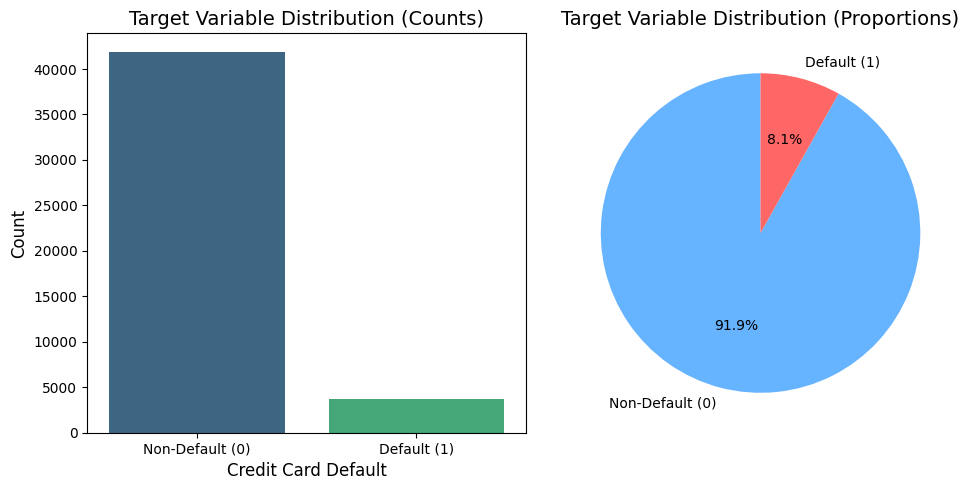

In [ ]:
#   DISTRIBUTION OF TARGET VARIABLE




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Check the distribution of the target variable
target_counts = df['credit_card_default'].value_counts()
target_proportions = df['credit_card_default'].value_counts(normalize=True)

print("Target Variable Distribution (Counts):")
print(target_counts)
print("\nTarget Variable Distribution (Proportions):")
print(target_proportions)

# Plot the distribution of the target variable
plt.figure(figsize=(10, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Target Variable Distribution (Counts)', fontsize=14)
plt.xlabel('Credit Card Default', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Default (0)', 'Default (1)'], fontsize=10)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts, labels=['Non-Default (0)', 'Default (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Target Variable Distribution (Proportions)', fontsize=14)

plt.tight_layout()
plt.show()


Summary Statistics for Numerical Variables:

                age  no_of_children  net_yearly_income  no_of_days_employed  \
count  45528.000000    44754.000000       4.552800e+04         45065.000000   
mean      38.993411        0.420655       2.006556e+05         67609.289293   
std        9.543990        0.724097       6.690740e+05        139323.524434   
min       23.000000        0.000000       2.717061e+04             2.000000   
25%       31.000000        0.000000       1.263458e+05           936.000000   
50%       39.000000        0.000000       1.717149e+05          2224.000000   
75%       47.000000        1.000000       2.406038e+05          5817.000000   
max       55.000000        9.000000       1.407590e+08        365252.000000   

       total_family_members  migrant_worker  yearly_debt_payments  \
count          45445.000000    45441.000000          45433.000000   
mean               2.158081        0.179111          31796.965311   
std                0.911572        0

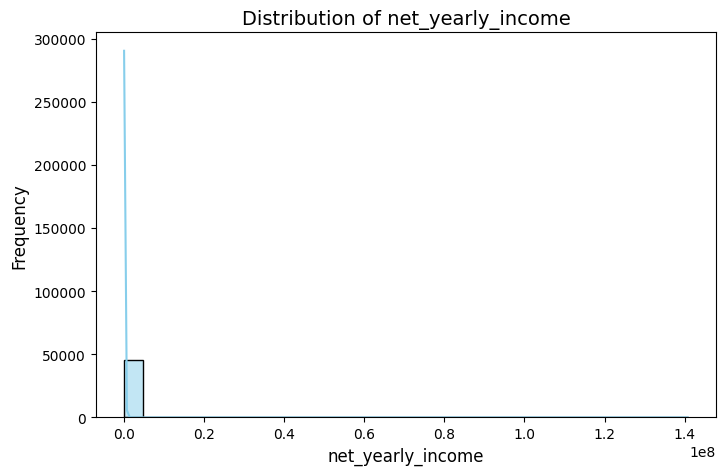

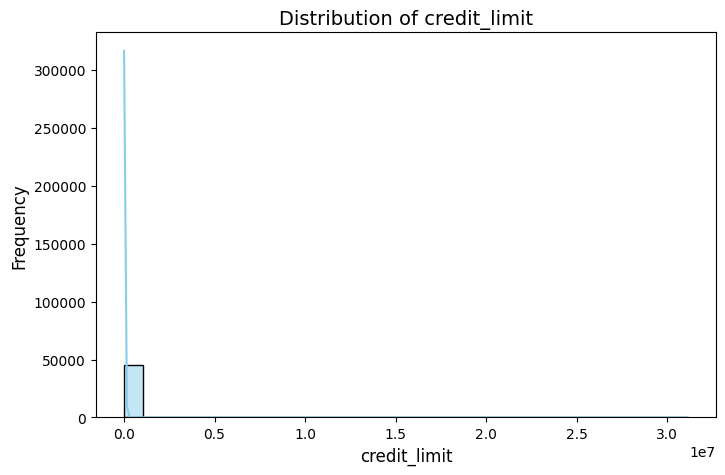

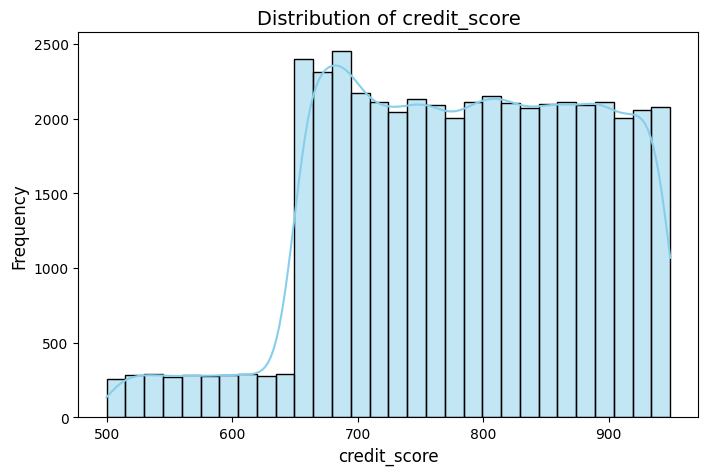

In [ ]:
# SUMMARY STATISTICS


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Display summary statistics for numerical features
summary_stats = df.describe()
print("Summary Statistics for Numerical Variables:\n")
print(summary_stats)

# Select key variables for detailed analysis
key_vars = ['net_yearly_income', 'credit_limit', 'credit_score']

# Detailed summary for selected variables
print("\nDetailed Summary for Selected Variables:")
for var in key_vars:
    print(f"\nVariable: {var}")
    print(f"Mean: {df[var].mean():.2f}")
    print(f"Median: {df[var].median():.2f}")
    print(f"Standard Deviation: {df[var].std():.2f}")
    print(f"Minimum: {df[var].min():.2f}")
    print(f"Maximum: {df[var].max():.2f}")

# Visualize the distribution of key variables
for var in key_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()


Correlation Matrix for Numeric Features:
                              age  no_of_children  net_yearly_income  \
age                      1.000000       -0.009082           0.004079   
no_of_children          -0.009082        1.000000           0.008939   
net_yearly_income        0.004079        0.008939           1.000000   
no_of_days_employed      0.000506       -0.243088          -0.029367   
total_family_members    -0.010640        0.880278           0.010432   
migrant_worker          -0.005519        0.070673           0.001478   
yearly_debt_payments    -0.002453        0.028706           0.076958   
credit_limit             0.004473        0.009354           0.993378   
credit_limit_used(%)    -0.005529        0.007487           0.002696   
credit_score             0.000817       -0.014673          -0.009688   
prev_defaults            0.001393        0.019528          -0.004696   
default_in_last_6months -0.001406        0.021620           0.015092   
credit_card_default    

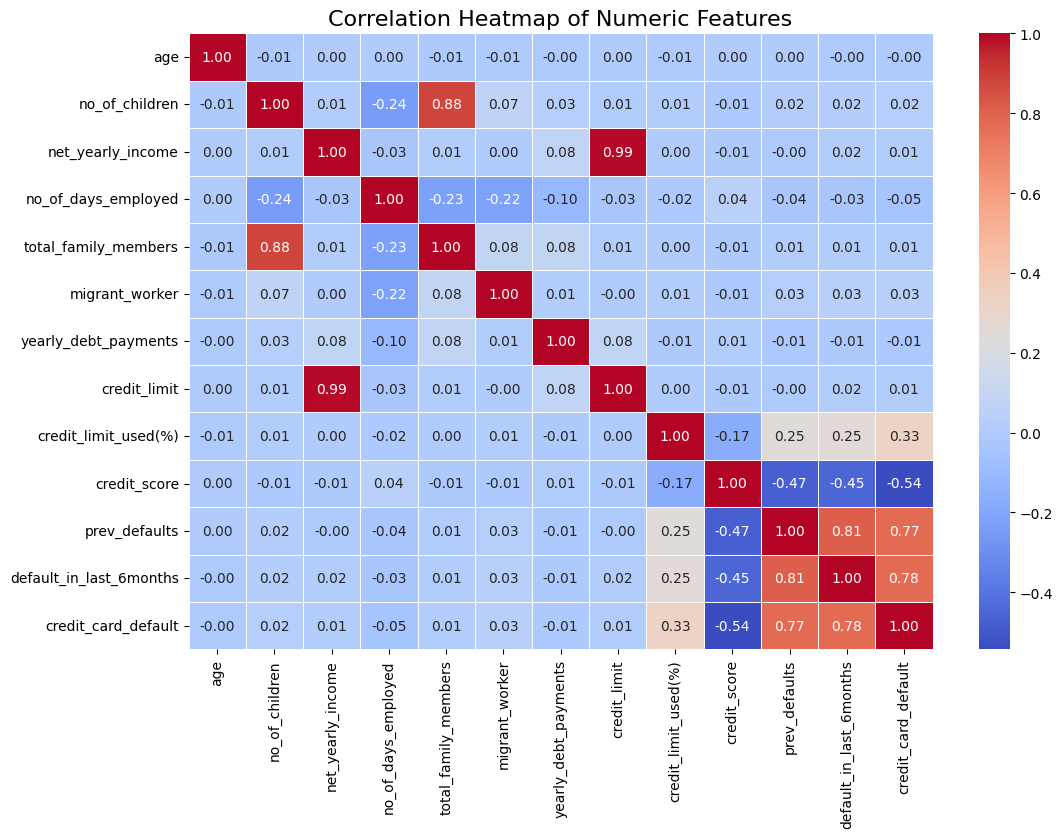


Correlations with Target Variable (credit_card_default):
credit_card_default        1.000000
default_in_last_6months    0.776078
prev_defaults              0.771704
credit_limit_used(%)       0.326641
migrant_worker             0.034013
no_of_children             0.023689
credit_limit               0.012250
net_yearly_income          0.011508
total_family_members       0.010754
age                       -0.000983
yearly_debt_payments      -0.013089
no_of_days_employed       -0.047043
credit_score              -0.543164
Name: credit_card_default, dtype: float64

Key Insights:
- 'credit_limit_used(%)' is positively correlated with 'credit_card_default'.
- 'credit_score' is negatively correlated with 'credit_card_default'.
- 'net_yearly_income' and 'debt_to_income_ratio' show decent correlations with 'credit_card_default'.


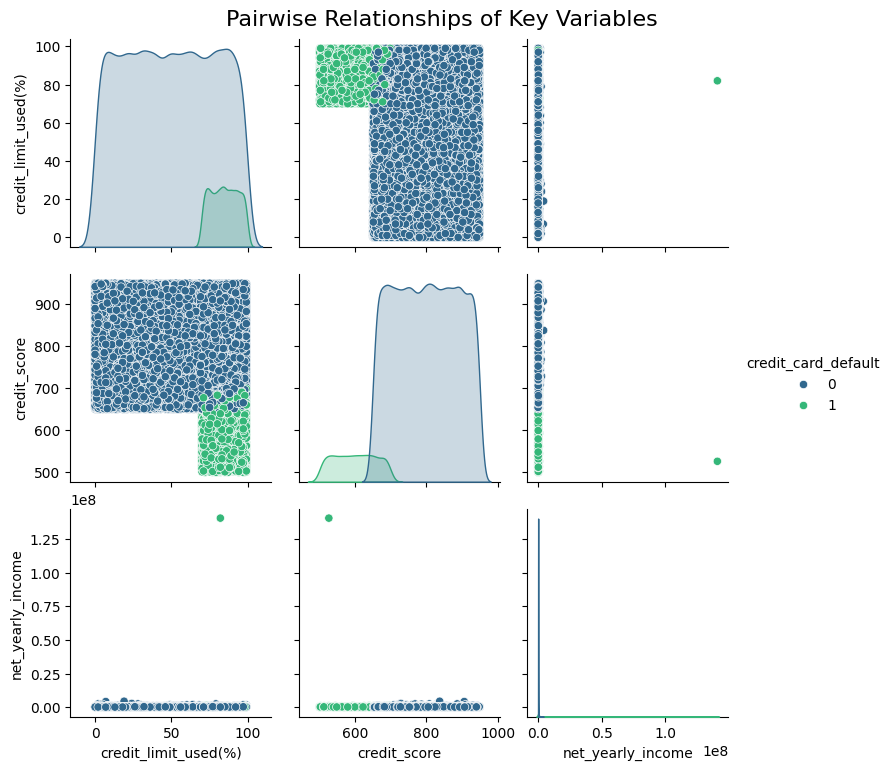

In [ ]:
# CORRELATION ANALYSIS



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Select numeric features for correlation analysis
numeric_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_features].corr()

# Display the correlation matrix
print("Correlation Matrix for Numeric Features:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

# Focus on correlations with the target variable
target_corr = correlation_matrix['credit_card_default'].sort_values(ascending=False)
print("\nCorrelations with Target Variable (credit_card_default):")
print(target_corr)

# Key insights
print("\nKey Insights:")
print("- 'credit_limit_used(%)' is positively correlated with 'credit_card_default'.")
print("- 'credit_score' is negatively correlated with 'credit_card_default'.")
print("- 'net_yearly_income' and 'debt_to_income_ratio' show decent correlations with 'credit_card_default'.")

# Pairplot for selected variables
key_vars = ['credit_limit_used(%)', 'credit_score', 'net_yearly_income', 'credit_card_default']
sns.pairplot(df[key_vars], hue='credit_card_default', palette='viridis', diag_kind='kde')
plt.suptitle("Pairwise Relationships of Key Variables", y=1.02, fontsize=16)
plt.show()


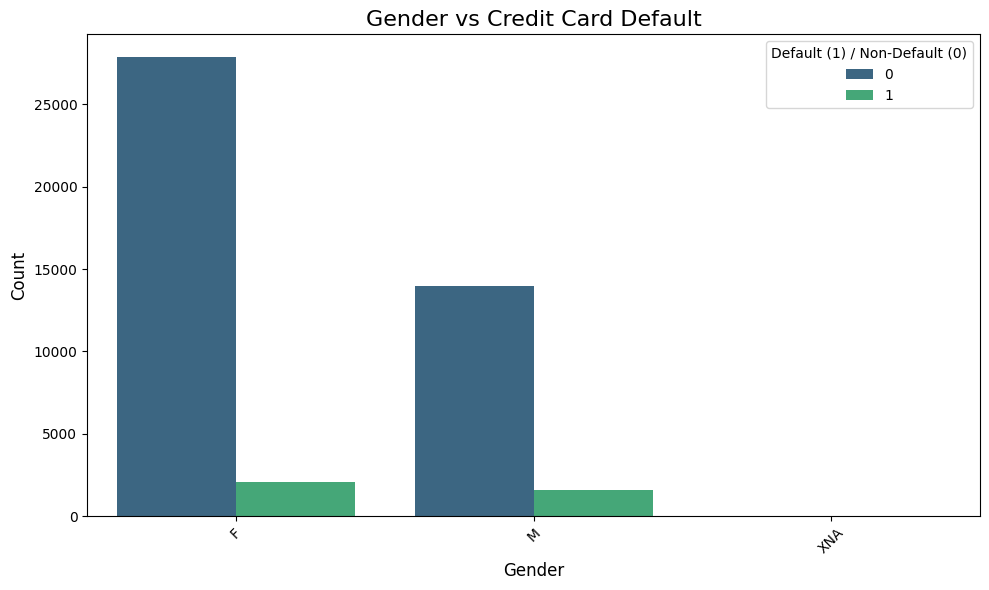

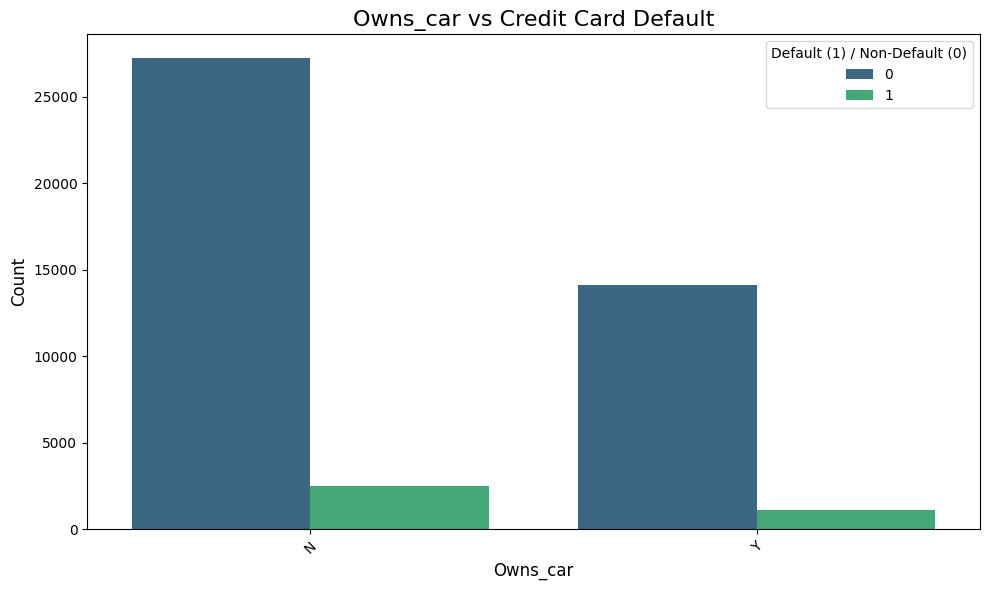

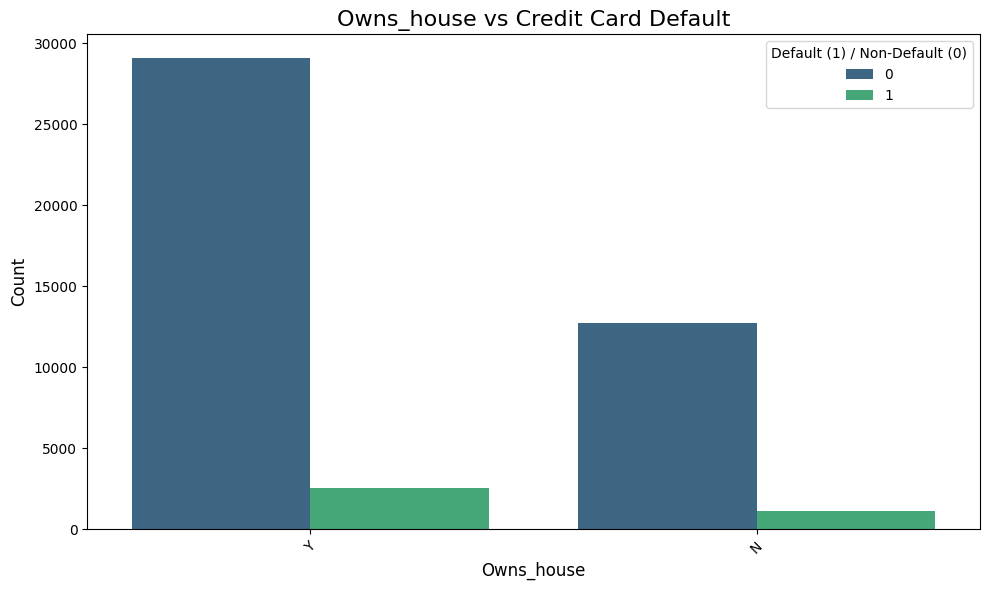

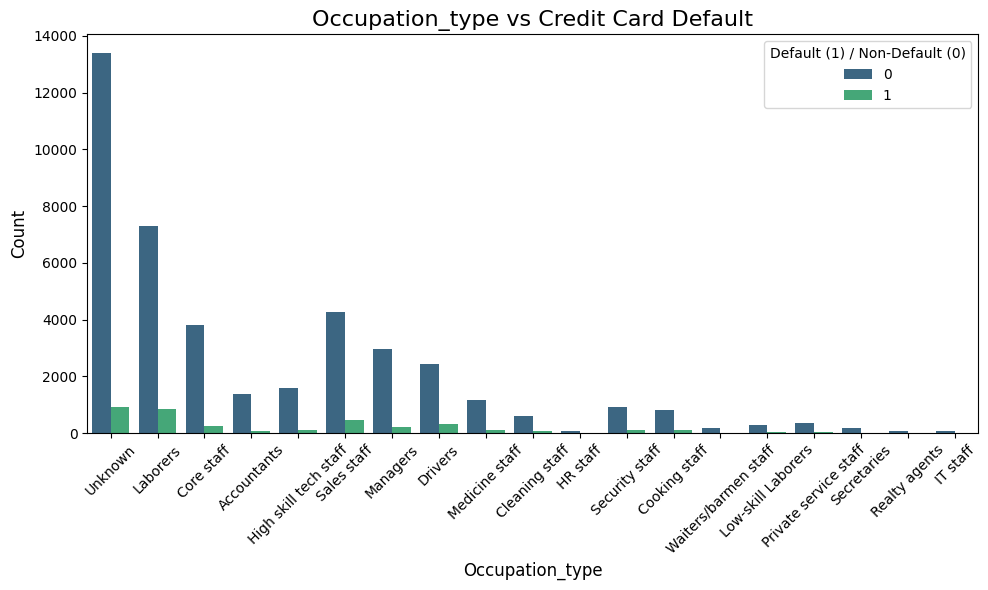


Proportion of Default (1) by Gender:
gender
F      0.069867
M      0.103019
XNA    0.000000
Name: credit_card_default, dtype: float64

Proportion of Default (1) by Owns_car:
owns_car
N    0.084524
Y    0.074616
Name: credit_card_default, dtype: float64

Proportion of Default (1) by Owns_house:
owns_house
N    0.082313
Y    0.080716
Name: credit_card_default, dtype: float64

Proportion of Default (1) by Occupation_type:
occupation_type
Accountants              0.052917
Cleaning staff           0.103759
Cooking staff            0.114191
Core staff               0.059823
Drivers                  0.116855
HR staff                 0.089744
High skill tech staff    0.063615
IT staff                 0.030303
Laborers                 0.104623
Low-skill Laborers       0.157738
Managers                 0.067551
Medicine staff           0.077647
Private service staff    0.074935
Realty agents            0.099010
Sales staff              0.096931
Secretaries              0.040201
Security staff  

In [ ]:
# CATEGORICAL VARIABLE ANALYSIS



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Identify categorical variables
categorical_features = ['gender', 'owns_car', 'owns_house', 'occupation_type']

# Analyze each categorical feature against the target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='credit_card_default', palette='viridis')
    plt.title(f'{feature.capitalize()} vs Credit Card Default', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Default (1) / Non-Default (0)', fontsize=10)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

# Compute proportions for each category
for feature in categorical_features:
    print(f"\nProportion of Default (1) by {feature.capitalize()}:")
    print(df.groupby(feature)['credit_card_default'].mean())


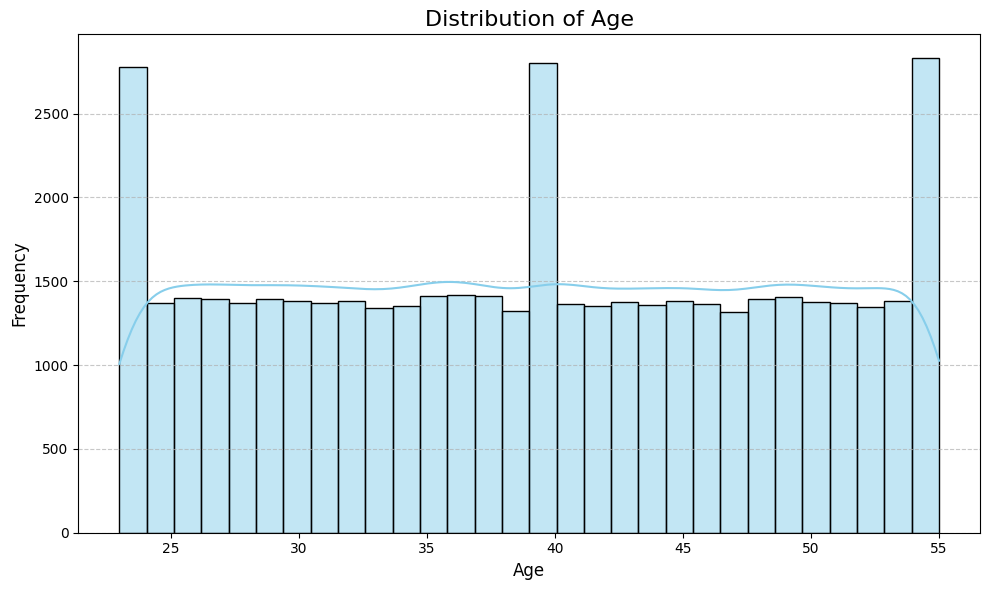

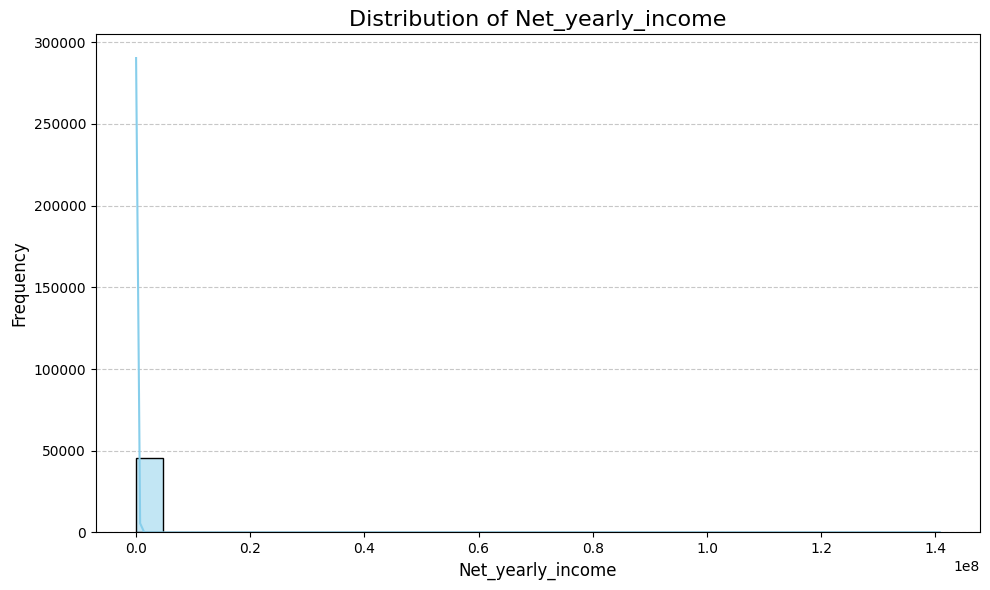

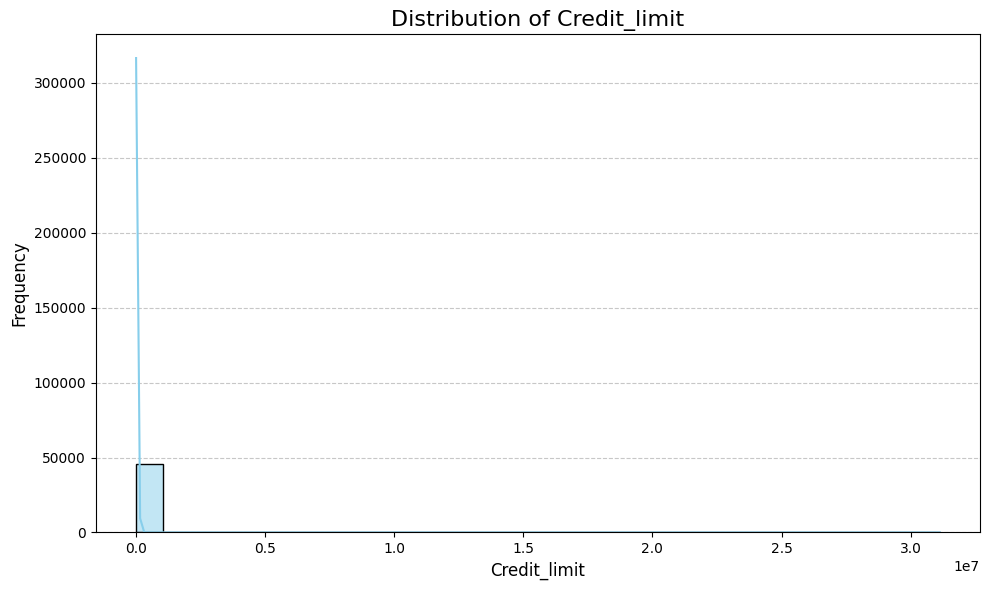

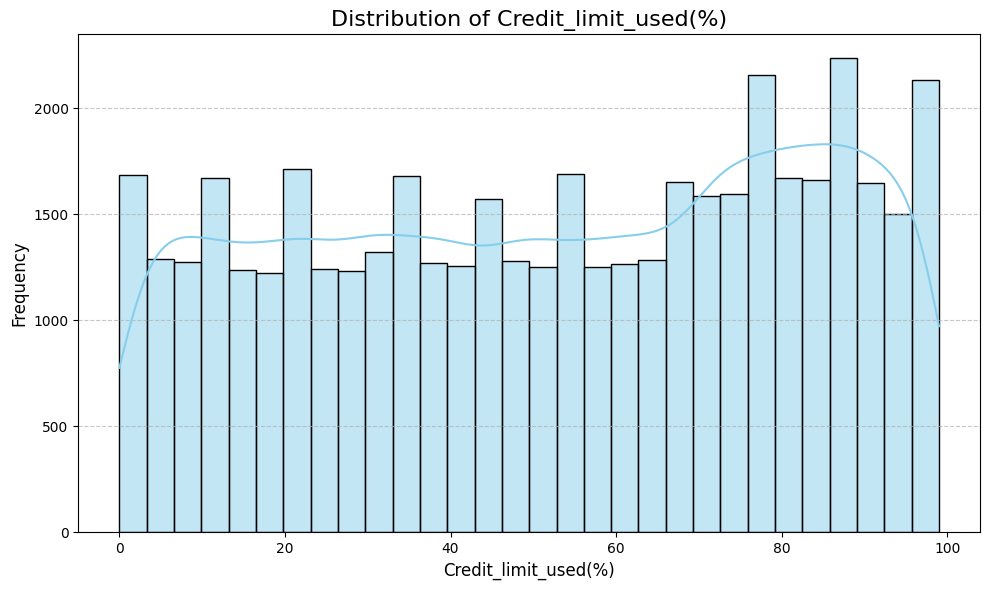

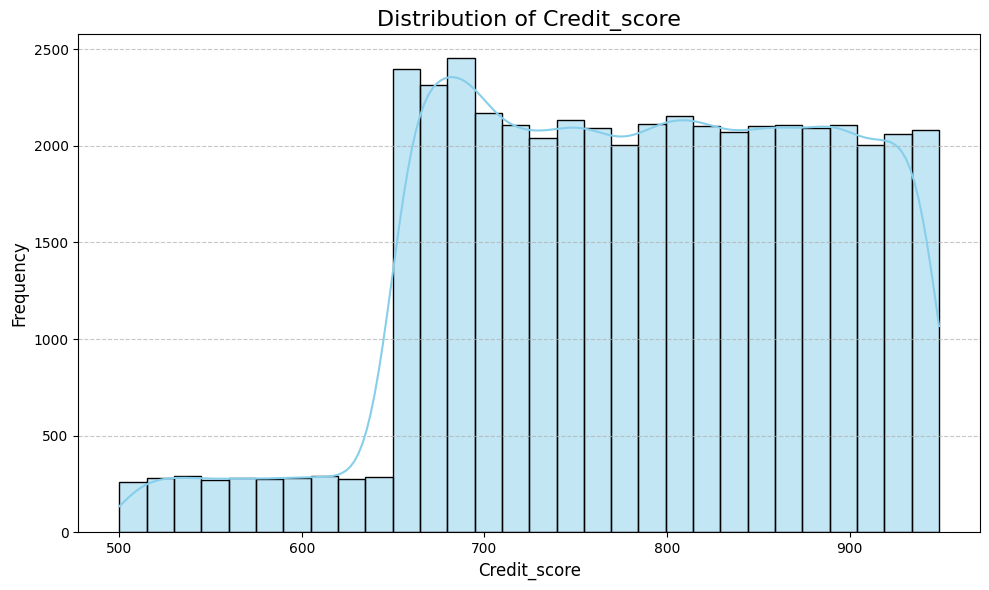

Summary Statistics for Numerical Features:

                age  net_yearly_income  credit_limit  credit_limit_used(%)  \
count  45528.000000       4.552800e+04  4.552800e+04           45528.00000   
mean      38.993411       2.006556e+05  4.354842e+04              52.23502   
std        9.543990       6.690740e+05  1.487847e+05              29.37691   
min       23.000000       2.717061e+04  4.003140e+03               0.00000   
25%       31.000000       1.263458e+05  2.397381e+04              27.00000   
50%       39.000000       1.717149e+05  3.568804e+04              54.00000   
75%       47.000000       2.406038e+05  5.343576e+04              78.00000   
max       55.000000       1.407590e+08  3.112997e+07              99.00000   

       credit_score  
count  45520.000000  
mean     782.791257  
std      100.619746  
min      500.000000  
25%      704.000000  
50%      786.000000  
75%      867.000000  
max      949.000000  

Skewness of Numerical Features:

age                  

In [ ]:
# NUMERICAL VARIABLE DISTRIBUTION


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Identify numerical features
numerical_features = ['age', 'net_yearly_income', 'credit_limit', 'credit_limit_used(%)', 'credit_score']

# Plot distributions of numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#  key statistics for numerical features
print("Summary Statistics for Numerical Features:\n")
print(df[numerical_features].describe())


print("\nSkewness of Numerical Features:\n")
print(df[numerical_features].skew())


<ipython-input-55-0d9b301c3bd6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='pastel')


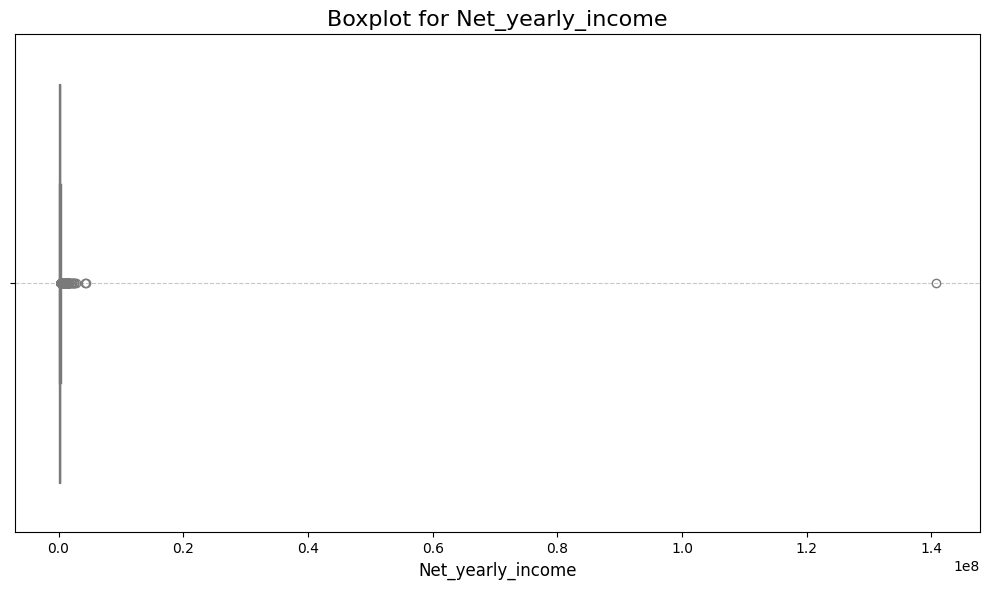

<ipython-input-55-0d9b301c3bd6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='pastel')


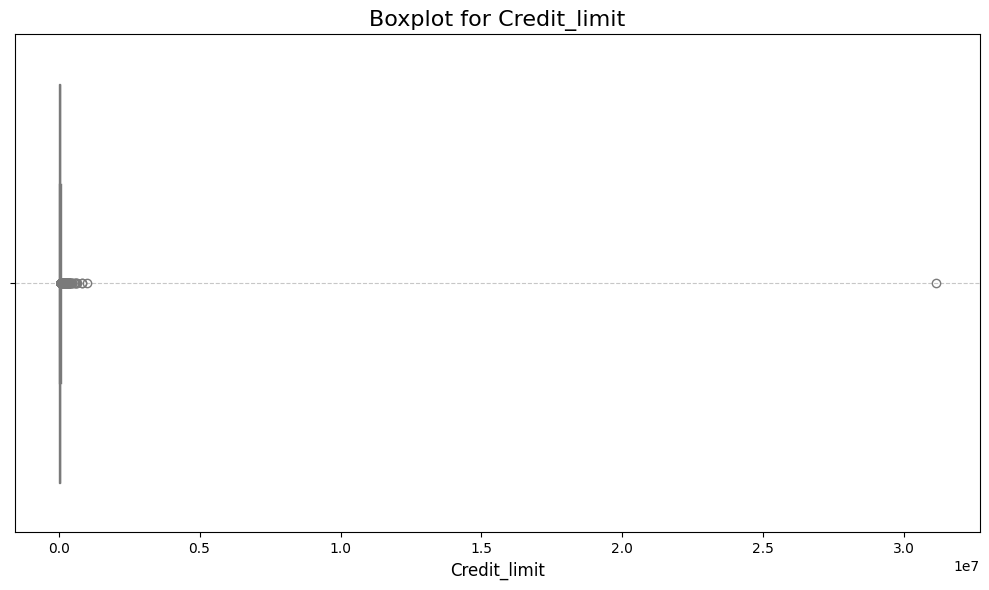

<ipython-input-55-0d9b301c3bd6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='pastel')


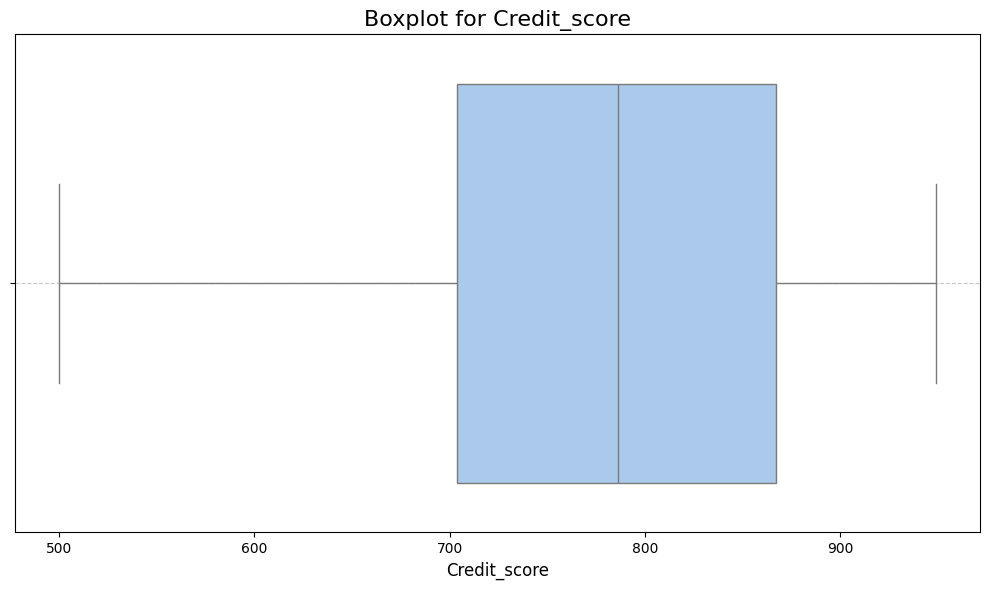

net_yearly_income: Outliers capped (original missing: 0, after capping: 0)
credit_limit: Outliers capped (original missing: 0, after capping: 0)
credit_score: Outliers capped (original missing: 8, after capping: 8)


<ipython-input-55-0d9b301c3bd6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='coolwarm')


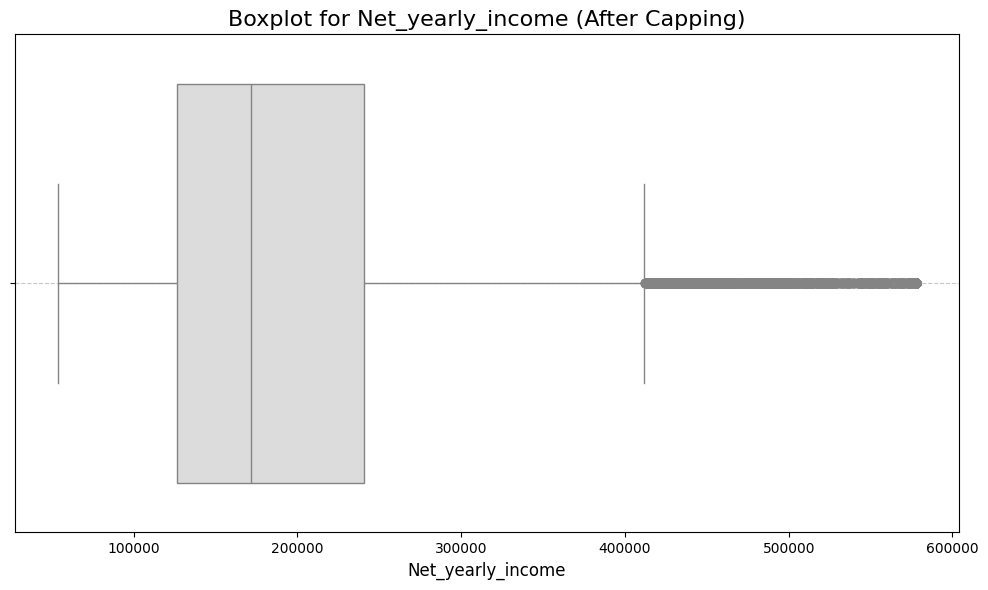

<ipython-input-55-0d9b301c3bd6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='coolwarm')


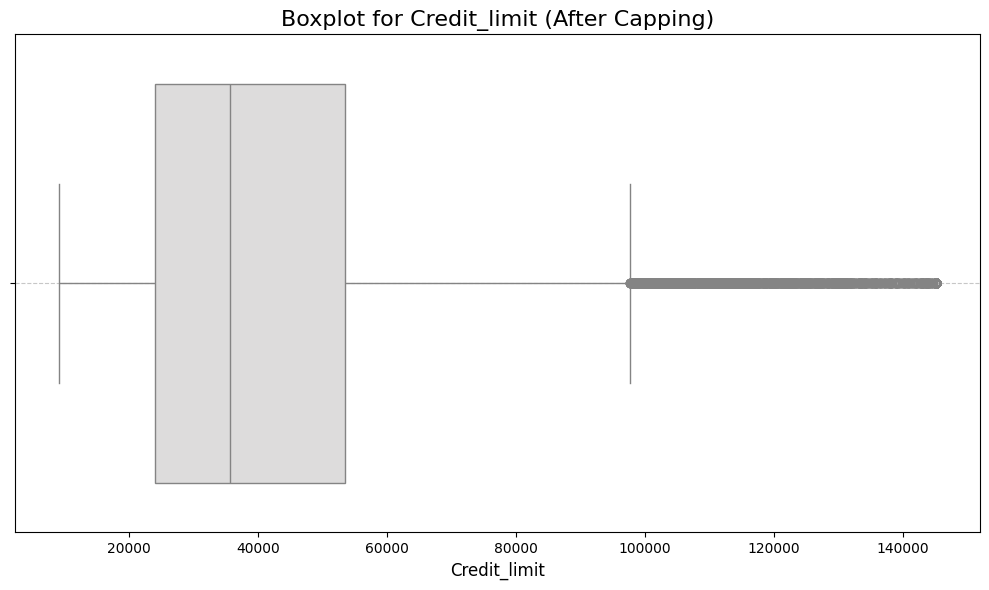

<ipython-input-55-0d9b301c3bd6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='coolwarm')


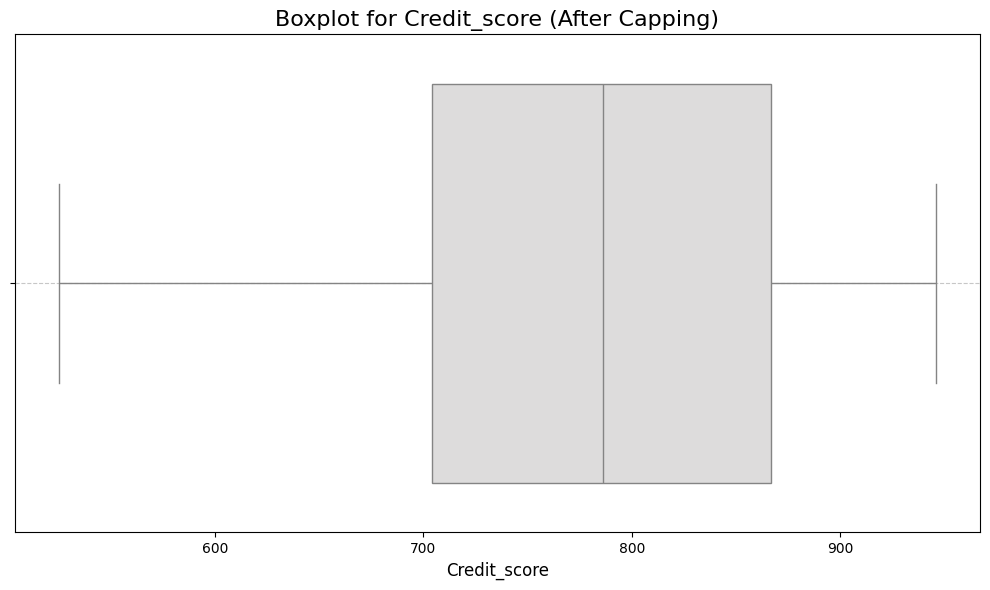

In [ ]:
# OUTLIER ANALYSIS



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Identify numerical features for outlier analysis
numerical_features = ['net_yearly_income', 'credit_limit', 'credit_score']

# Boxplots to visualize outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, palette='pastel')
    plt.title(f'Boxplot for {feature.capitalize()}', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Define a function to cap outliers
def cap_outliers(data, feature, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = data[feature].quantile(lower_percentile)
    upper_limit = data[feature].quantile(upper_percentile)
    data[feature] = np.where(data[feature] < lower_limit, lower_limit, data[feature])
    data[feature] = np.where(data[feature] > upper_limit, upper_limit, data[feature])
    return data

# Apply capping for outliers
for feature in numerical_features:
    original_count = df[feature].isna().sum()
    df = cap_outliers(df, feature)
    capped_count = df[feature].isna().sum()
    print(f"{feature}: Outliers capped (original missing: {original_count}, after capping: {capped_count})")

# Recheck outliers using boxplots after capping
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, palette='coolwarm')
    plt.title(f'Boxplot for {feature.capitalize()} (After Capping)', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


<ipython-input-56-32a52d700fa5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='credit_card_default', y=feature, palette='coolwarm')


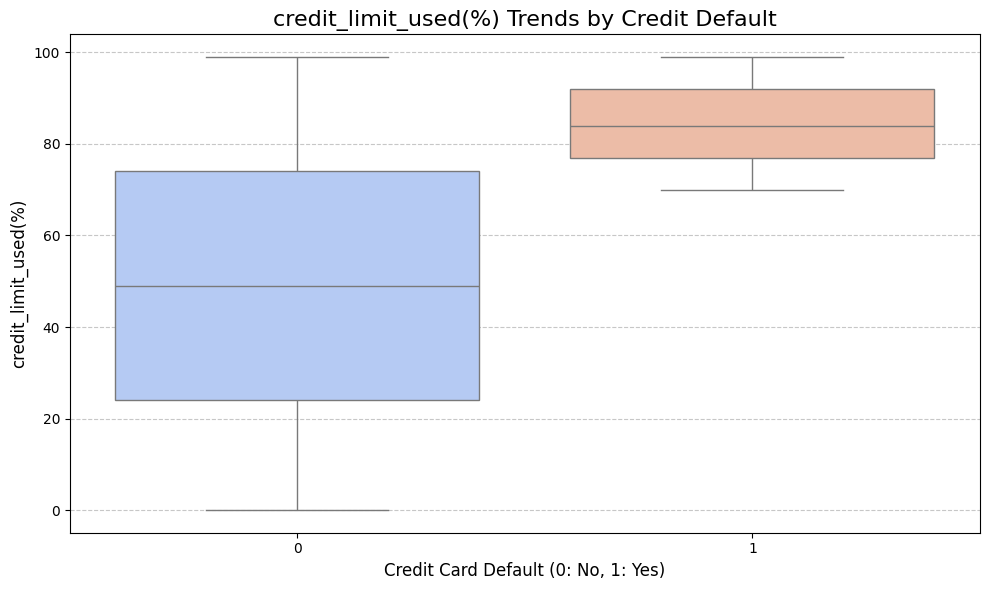

<ipython-input-56-32a52d700fa5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='credit_card_default', y=feature, palette='coolwarm')


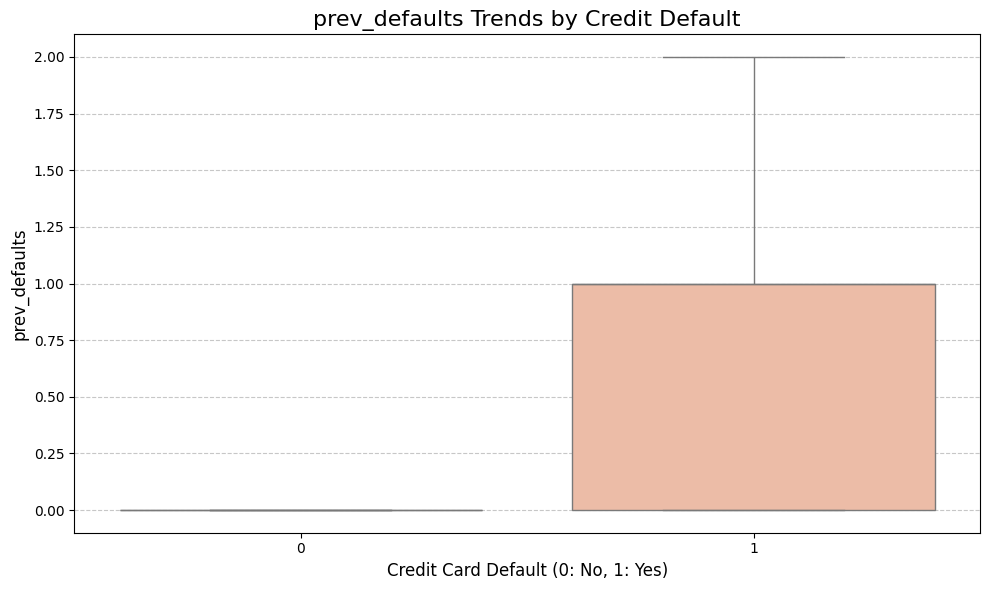

<ipython-input-56-32a52d700fa5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='credit_card_default', y=feature, palette='coolwarm')


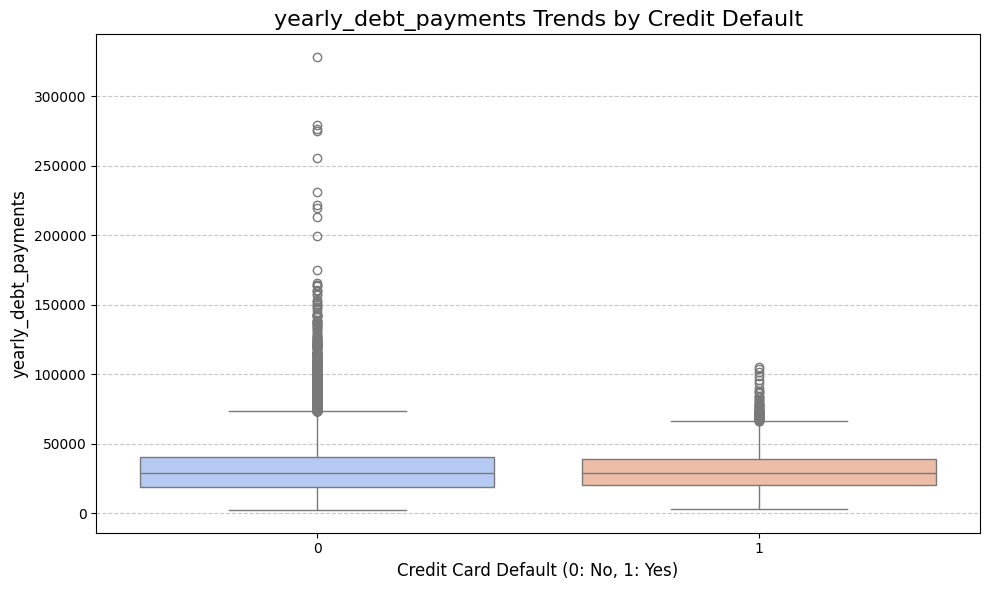

Average Values of Key Features by Default Status:

credit_limit_used(%):
credit_card_default
0    49.382372
1    84.512307
Name: credit_limit_used(%), dtype: float64

prev_defaults:
credit_card_default
0    0.000000
1    0.747633
Name: prev_defaults, dtype: float64

yearly_debt_payments:
credit_card_default
0    31864.163465
1    31036.564194
Name: yearly_debt_payments, dtype: float64


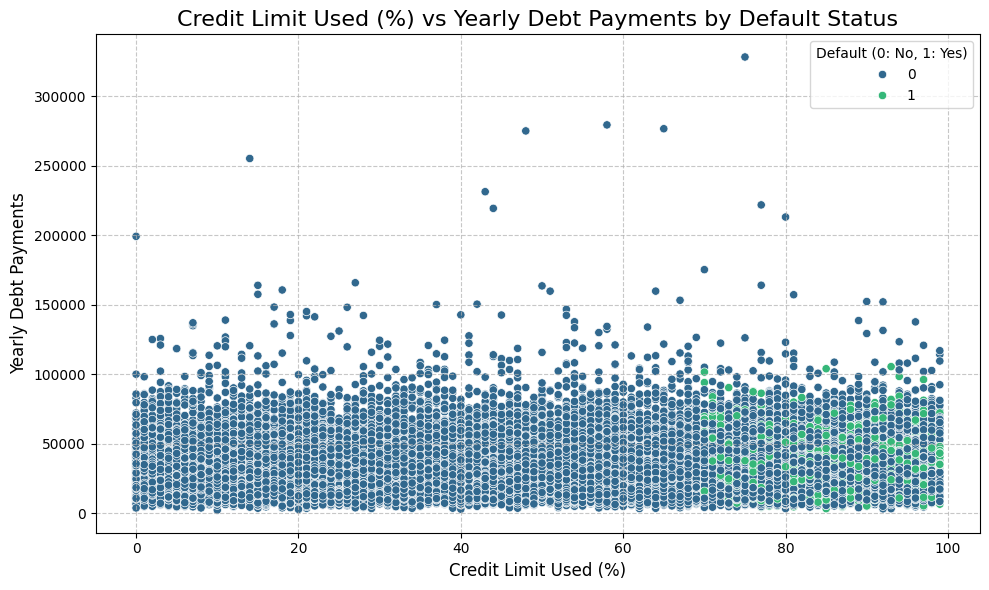

In [ ]:
# CREDIT CARD DEFAULT TRENDS



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Variables to analyze trends
trend_features = ['credit_limit_used(%)', 'prev_defaults', 'yearly_debt_payments']

# Analyze trends for each variable
for feature in trend_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='credit_card_default', y=feature, palette='coolwarm')
    plt.title(f'{feature} Trends by Credit Default', fontsize=16)
    plt.xlabel('Credit Card Default (0: No, 1: Yes)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Calculate averages grouped by default status
print("Average Values of Key Features by Default Status:")
for feature in trend_features:
    print(f"\n{feature}:")
    print(df.groupby('credit_card_default')[feature].mean())

# Scatterplot for feature interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='credit_limit_used(%)', y='yearly_debt_payments', hue='credit_card_default', palette='viridis')
plt.title('Credit Limit Used (%) vs Yearly Debt Payments by Default Status', fontsize=16)
plt.xlabel('Credit Limit Used (%)', fontsize=12)
plt.ylabel('Yearly Debt Payments', fontsize=12)
plt.legend(title='Default (0: No, 1: Yes)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


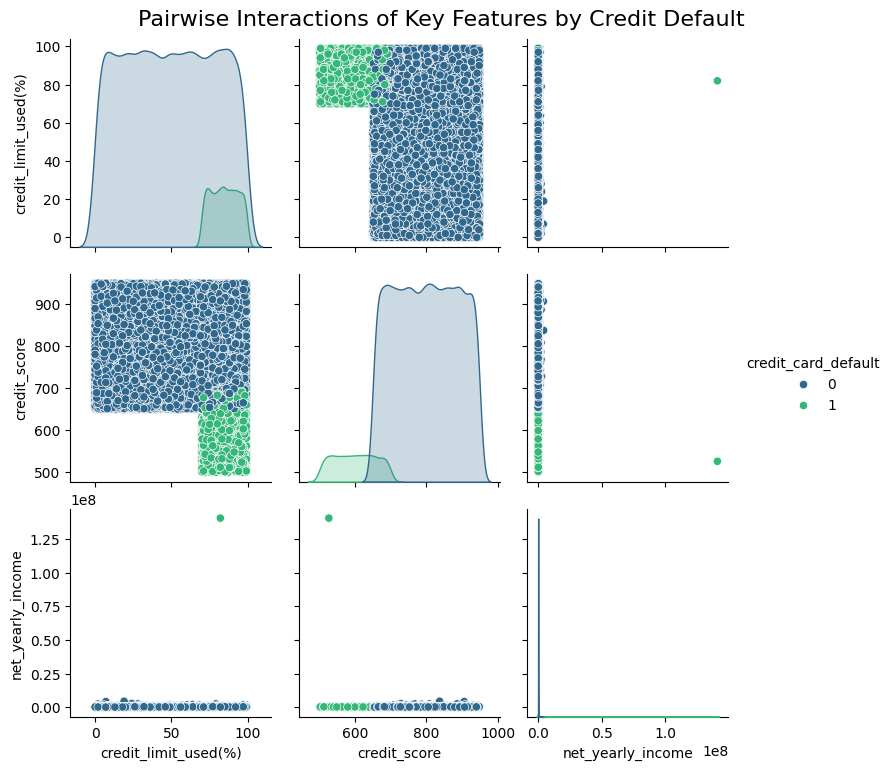

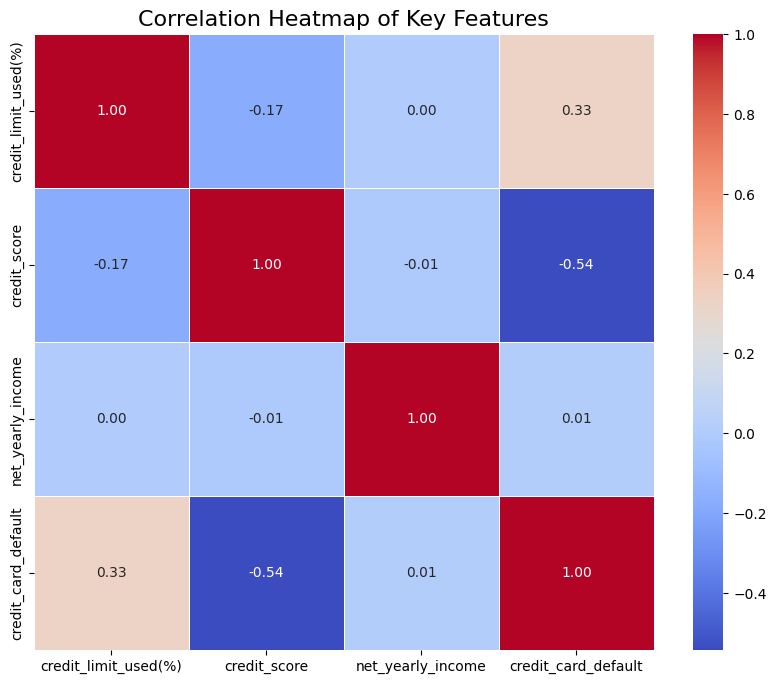

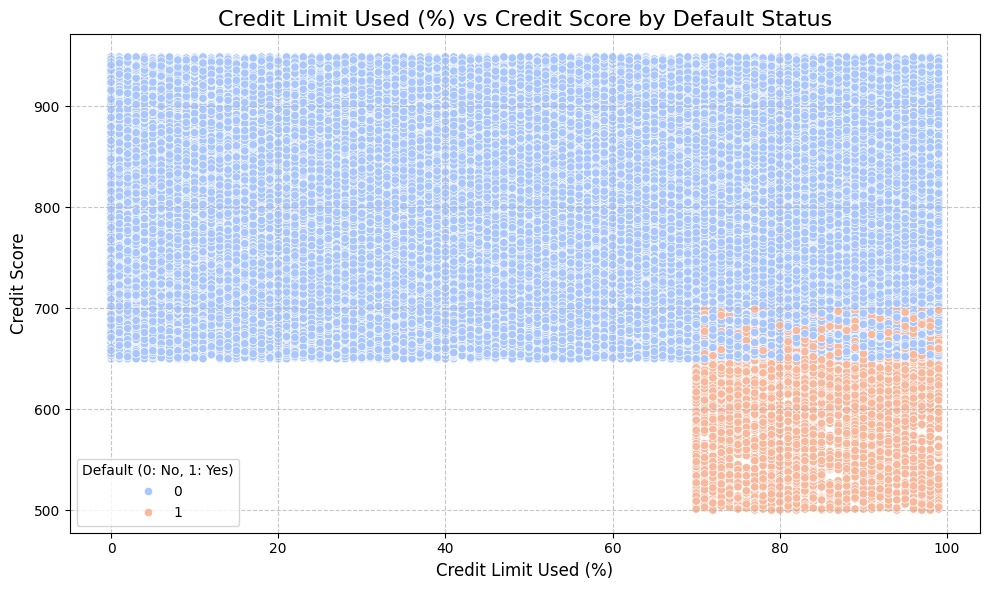

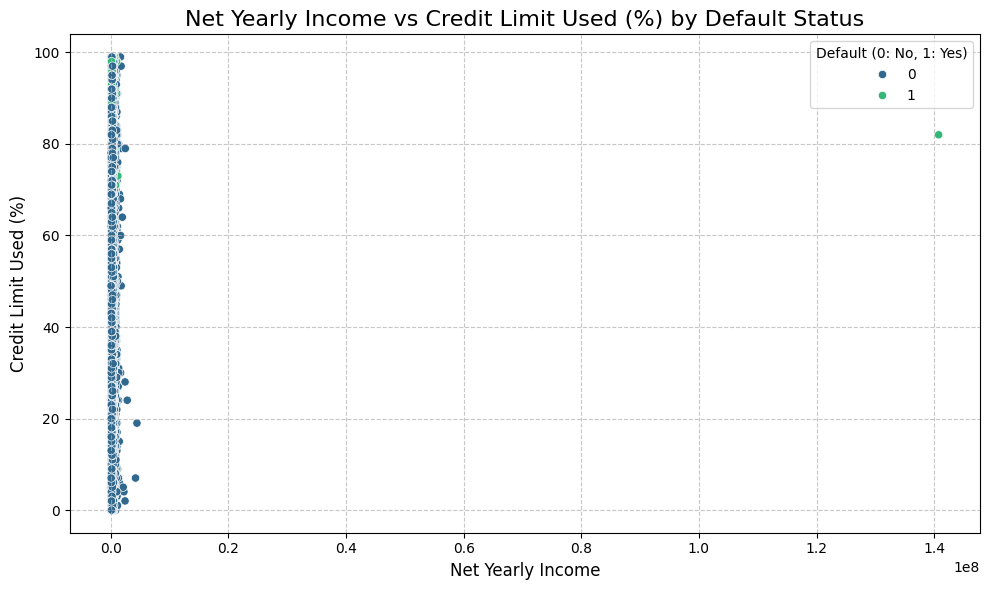

In [ ]:
# FEATURE INTERACTION



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Select key variables for interaction analysis
interaction_features = ['credit_limit_used(%)', 'credit_score', 'net_yearly_income', 'credit_card_default']

# Pairplot for feature interaction analysis
sns.pairplot(df[interaction_features], hue='credit_card_default', palette='viridis', diag_kind='kde')
plt.suptitle("Pairwise Interactions of Key Features by Credit Default", y=1.02, fontsize=16)
plt.show()

# Heatmap for feature correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[interaction_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Features", fontsize=16)
plt.show()

# Interaction: Scatterplot of Credit Limit Used (%) vs Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='credit_limit_used(%)', y='credit_score', hue='credit_card_default', palette='coolwarm')
plt.title("Credit Limit Used (%) vs Credit Score by Default Status", fontsize=16)
plt.xlabel("Credit Limit Used (%)", fontsize=12)
plt.ylabel("Credit Score", fontsize=12)
plt.legend(title='Default (0: No, 1: Yes)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Interaction: Scatterplot of Net Yearly Income vs Credit Limit Used (%)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='net_yearly_income', y='credit_limit_used(%)', hue='credit_card_default', palette='viridis')
plt.title("Net Yearly Income vs Credit Limit Used (%) by Default Status", fontsize=16)
plt.xlabel("Net Yearly Income", fontsize=12)
plt.ylabel("Credit Limit Used (%)", fontsize=12)
plt.legend(title='Default (0: No, 1: Yes)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()






Class Distribution (Counts):
credit_card_default
0    41831
1     3697
Name: count, dtype: int64

Class Distribution (Proportions):
credit_card_default
0    0.918797
1    0.081203
Name: proportion, dtype: float64


<ipython-input-58-400ef4daeb95>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


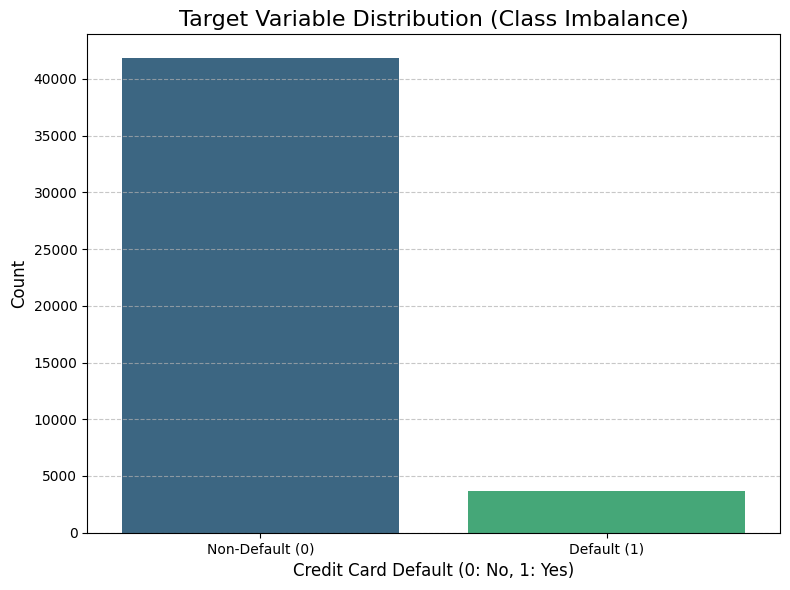

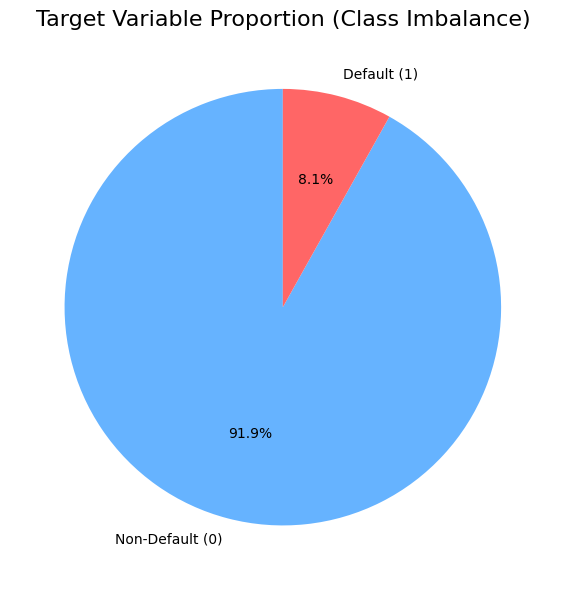

In [ ]:
# DATA IMBALANCE VISUALISATION



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Sudheer Project/train.csv')

# Check the distribution of the target variable
target_counts = df['credit_card_default'].value_counts()
target_proportions = df['credit_card_default'].value_counts(normalize=True)

print("Class Distribution (Counts):")
print(target_counts)

print("\nClass Distribution (Proportions):")
print(target_proportions)

# Bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title("Target Variable Distribution (Class Imbalance)", fontsize=16)
plt.xlabel("Credit Card Default (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie chart for class proportions
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=['Non-Default (0)', 'Default (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title("Target Variable Proportion (Class Imbalance)", fontsize=16)
plt.tight_layout()
plt.show()
